# **Lesson 10 : Clustering Algortihms**

### **1. Get Data**

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_name = 'AI Specialist Lesson 10.zip'
path = os.path.join(data_path, data_name)

os.mkdir('Lesson 10')
working_dir = os.path.join(os.getcwd(), 'Lesson 10')
os.chdir(working_dir)

In [4]:
with zipfile.ZipFile(path, 'r') as data_zipfile:
  data_zipfile.extractall(working_dir)

In [5]:
df = pd.read_csv('AI Specialist Lesson 10/Mall_Customers.csv')
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
df.rename(index=str, columns={'Annual Income (k$)':'Income',
                              'Spending Score (1-100)':'Score'}, inplace=True)
display(df.head())

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


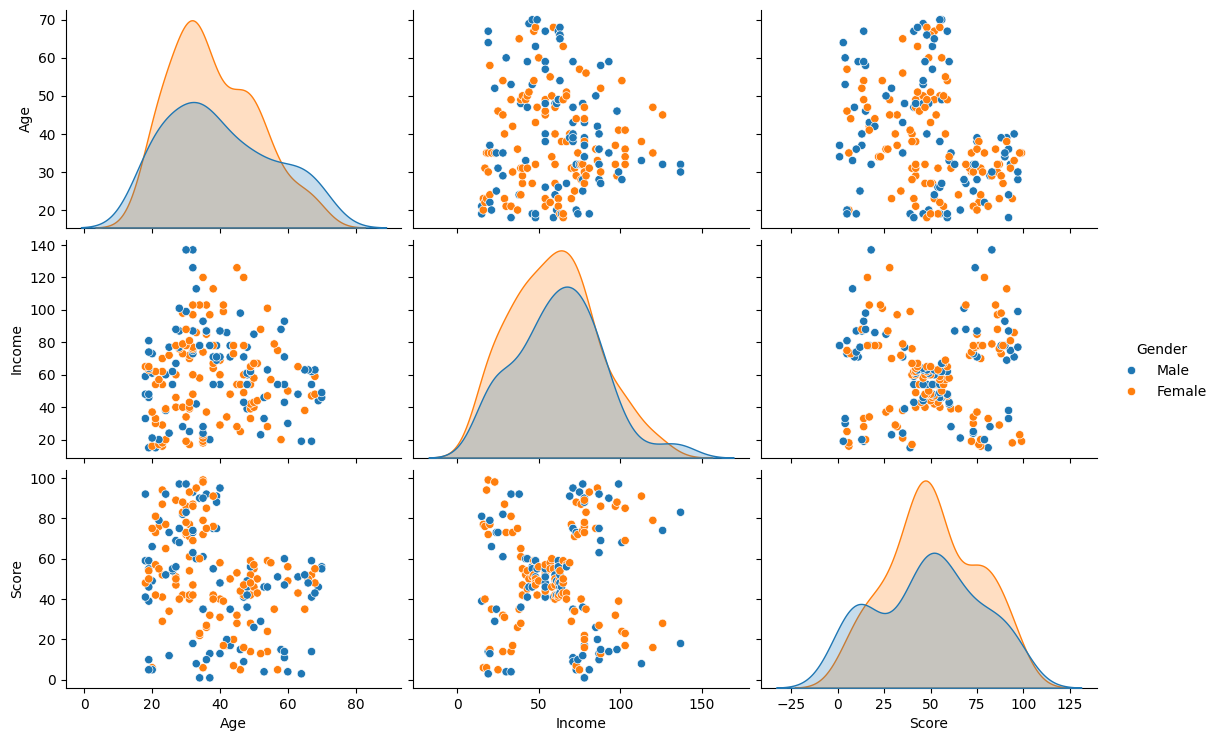

In [10]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

>**Note:**
* From the above plot **we see that gender has no direct relation to segmenting customers**. That's why we can drop it and move on with other features which is why we will X parameter from now on.
* Nhìn vào biểu đồ quan hệ giữa `Income` và `Score`, có thể phỏng đoán có 5 class.

>**Conclusion:**
* Question : How many group of customer and assign labels to each groups

### **2. K-Means**
There are many models for **clustering** out there. We will be going through most popular ones. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, we see how to use k-Means for customer segmentation.

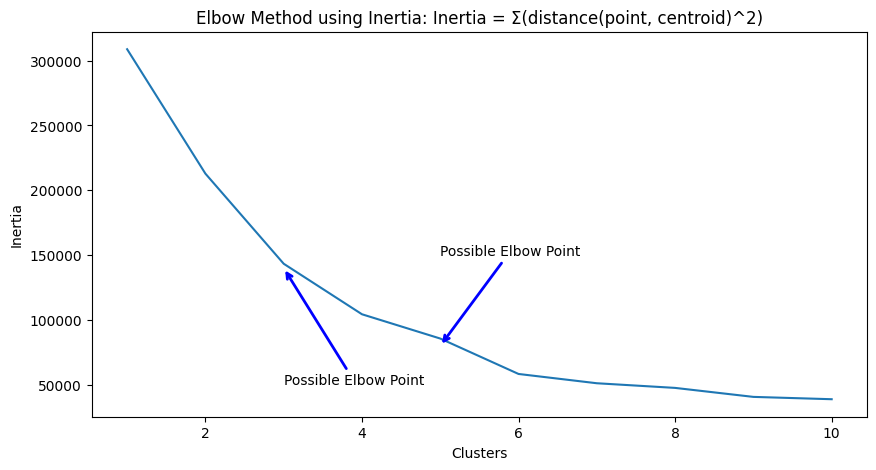

In [11]:
from sklearn.cluster import KMeans
cluster=[]
for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init='auto').fit(X)
  cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=list(range(1, 11)), y=cluster, ax=ax)
ax.set_title('Elbow Method using Inertia: Inertia = Σ(distance(point, centroid)^2)')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

>**Note:**
* Với phương pháp `Elbow` ngoài độ đo là `Inertia`(quán tính), còn có thể sử dụng độ đo `Distortions`(độ méo).
* **Distortion = 1/n * Σ(distance(point, centroid)^2)** (https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)
* Tại K từ 3 đến 5 `Inertia` không còn giảm nhiều khi tăng số lượng cluster lên, chọn K=5 cũng thích hợp với phỏng đoán bên trên.

##### **Creating the Visual Plots**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


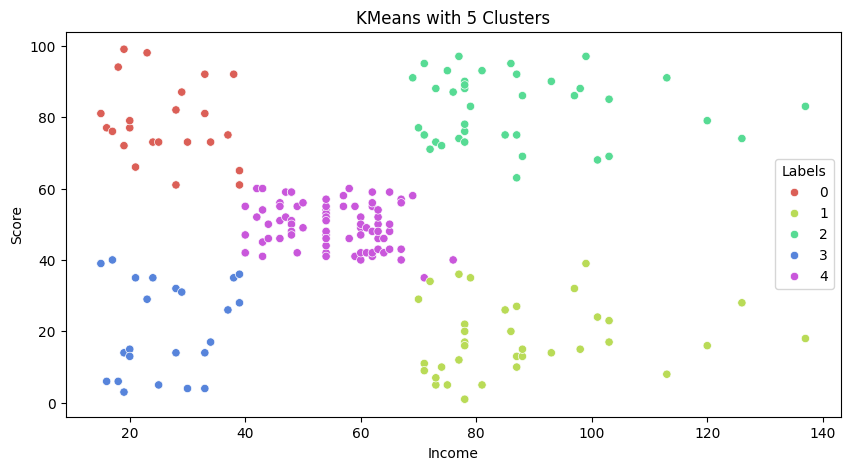

In [12]:
# K=5
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title("KMeans with 5 Clusters")
plt.show()

>**Conclusion:**
* By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.
* We can analyze our 5 clusters in detail now:

- `Label 0` is low income and low
spending
- `Label 1` is high income and high spending
- `Label 2` is mid income and mid spending
- `Label 3` is high income and low spending
- `Label 4` is low income and high spending

**Also let's see them more clearly with swarmplot:**

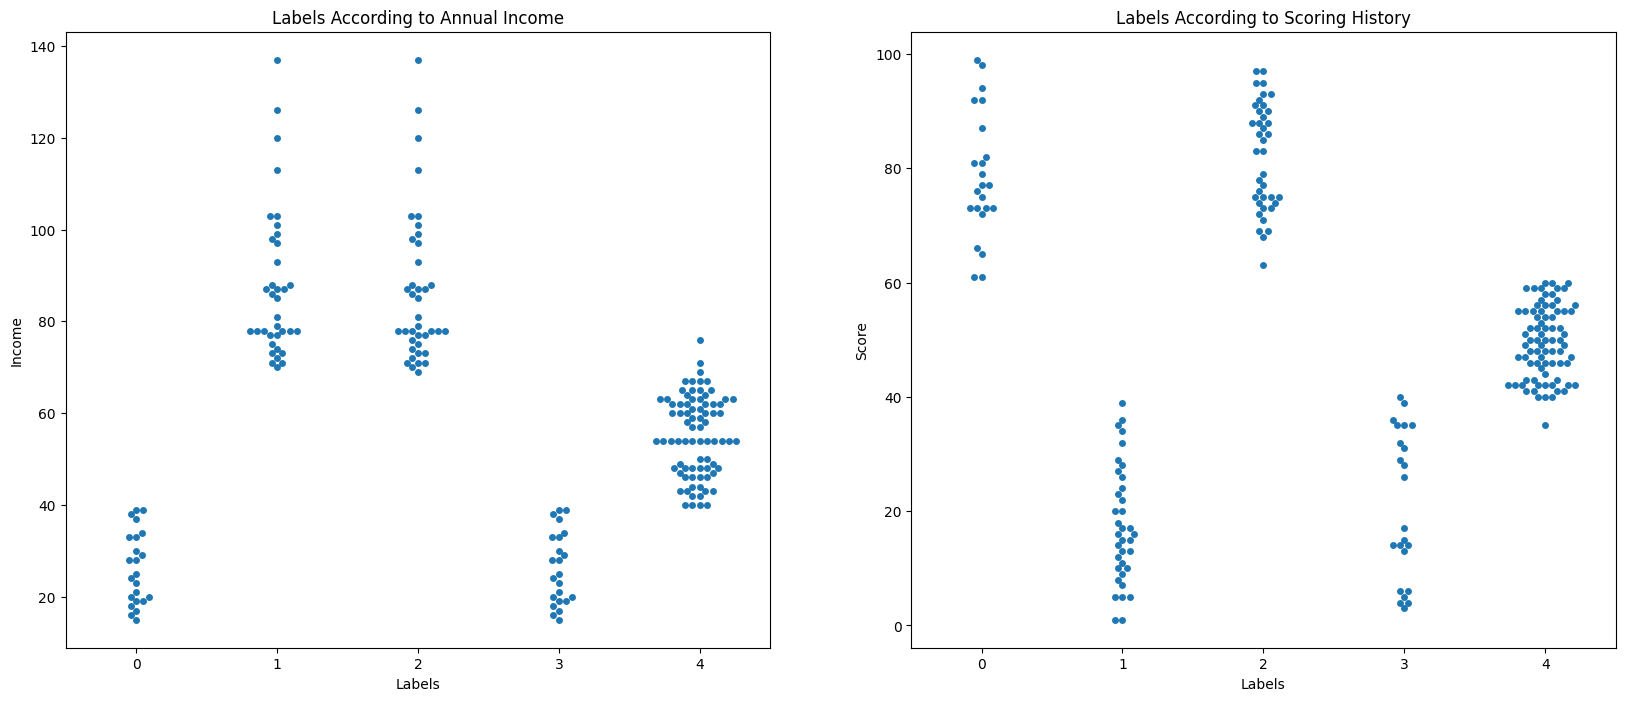

In [13]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

### **3. Hierarchical Clustering**

##### **3.1 Agglomerative**

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Agglomerative is the bottom up approach which is more popular than **Divisive clustering**. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul>
        <li> Value will be: 'complete' </li>
        <li> <b>Note</b>: It is recommended that try everything with 'average' as well </li>
    </ul>
</ul>

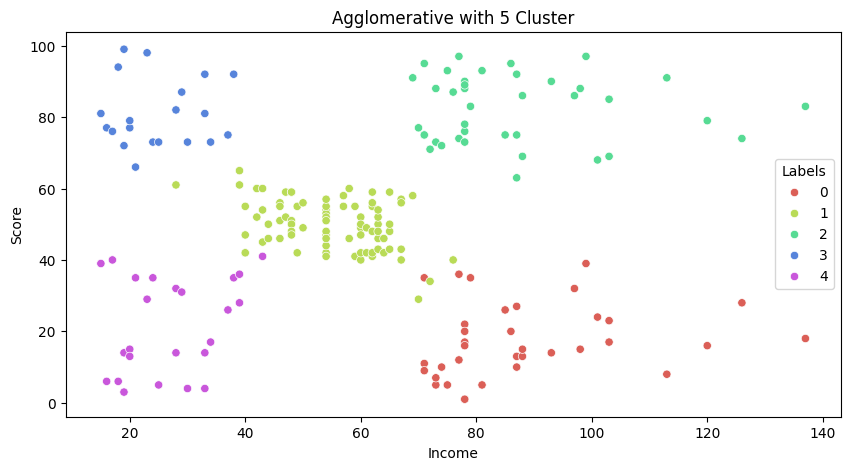

In [14]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Cluster')
plt.show()

In [15]:
X[X['Labels']==4].describe()

,Age,Income,Score,Labels
count,24.000000,24.00000,24.000000,24.0
mean,45.291667,27.00000,21.750000,4.0
std,12.942949,8.43904,13.375025,0.0
min,19.000000,15.00000,3.000000,4.0
25%,35.750000,19.75000,11.250000,4.0
50%,46.500000,26.50000,21.500000,4.0
75%,53.250000,33.25000,35.000000,4.0
max,67.000000,43.00000,41.000000,4.0


>**Note:**
* Dựa vào `describe` theo từng `cluster` khác nhau, có thể suy ra được đặc điểm của `cluster` này.
* Ex: `Cluster` có label=4 có min của `Income` và `Score` đều thấp ==> Khách hàng ở cluster này thu nhập thấp, nên mức tiêu dùng cũng thấp.


##### **3.2 Dendrogram Associated for the Agglomerative Hierarchical Clustering**
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
We can use the function <b> distance_matrix, </b> which requires <b>two inputs</b>.
Remember that the distance values are `symmetric`, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br>

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X) # Distance from each point to every other point of dataset
print(X.shape)
print(dist.shape)
display(dist)

(200, 4)
(200, 200)


array([[  0.        ,  42.05948169,  33.03028913, ..., 117.12813496,
        124.53915047, 130.17296186],
       [ 42.05948169,   0.        ,  75.01999733, ..., 111.76761606,
        137.77880824, 122.35195135],
       [ 33.03028913,  75.01999733,   0.        , ..., 129.89226305,
        122.24974438, 143.78456106],
       ...,
       [117.12813496, 111.76761606, 129.89226305, ...,   0.        ,
         57.10516614,  14.35270009],
       [124.53915047, 137.77880824, 122.24974438, ...,  57.10516614,
          0.        ,  65.06150936],
       [130.17296186, 122.35195135, 143.78456106, ...,  14.35270009,
         65.06150936,   0.        ]])

>**Note:**
* `distance_matrix` là đúng, vì là ma trận đối xứng và có đường chéo là 0.

In [17]:
pd.DataFrame(dist).style.background_gradient(cmap='Blues')

Output hidden; open in https://colab.research.google.com to view.

Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul>

In [18]:
Z = hierarchy.linkage(dist, 'complete')

<ipython-input-18-4acca9972bb1>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters.
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

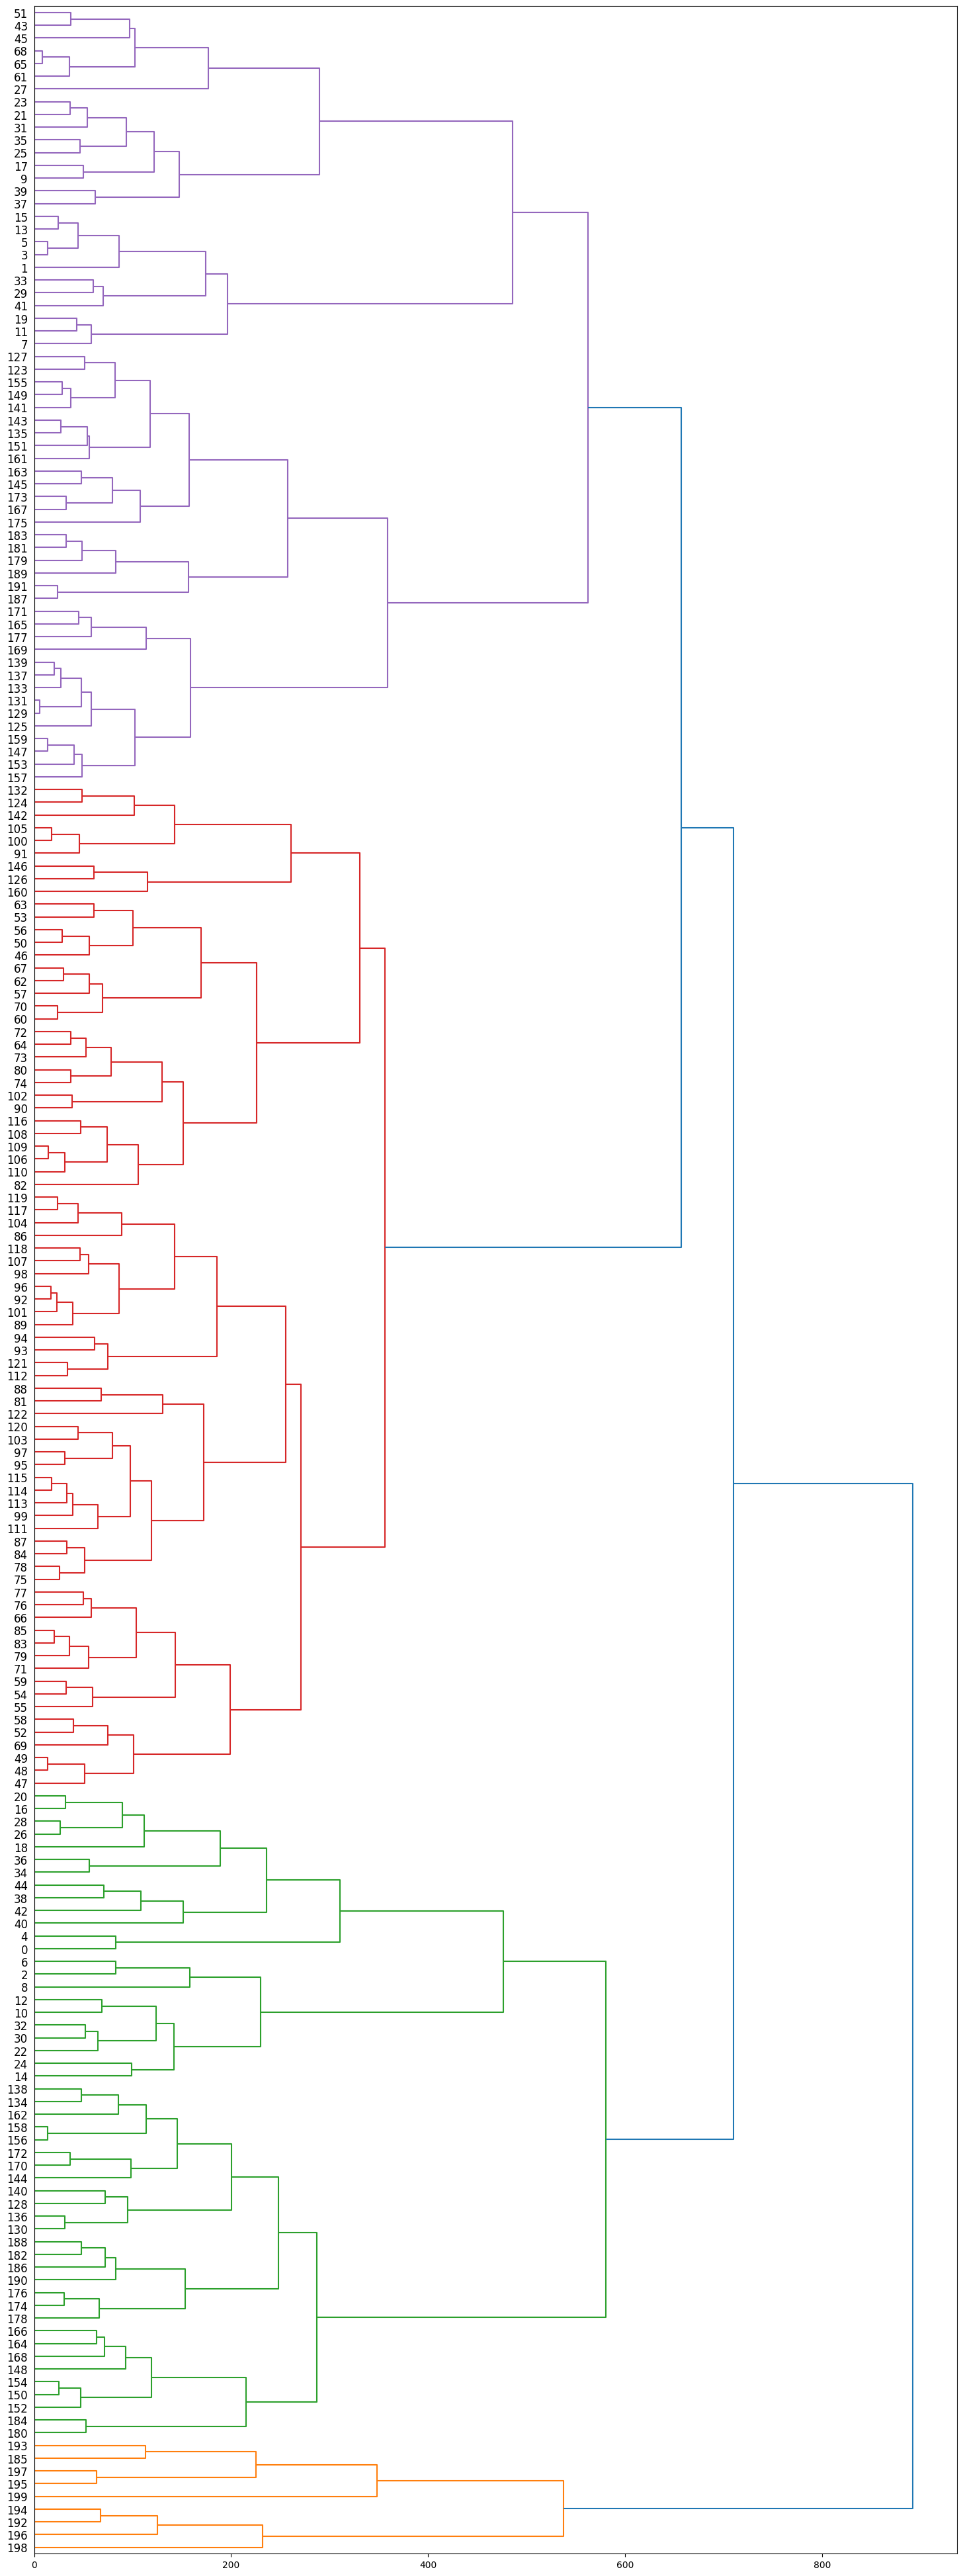

In [19]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12,
                              orientation='right')

>**Note:**
* We used __complete__ linkage for our case, let's change it to __average__ linkage to see how the dendogram changes.

<ipython-input-20-54ae435f7a9c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


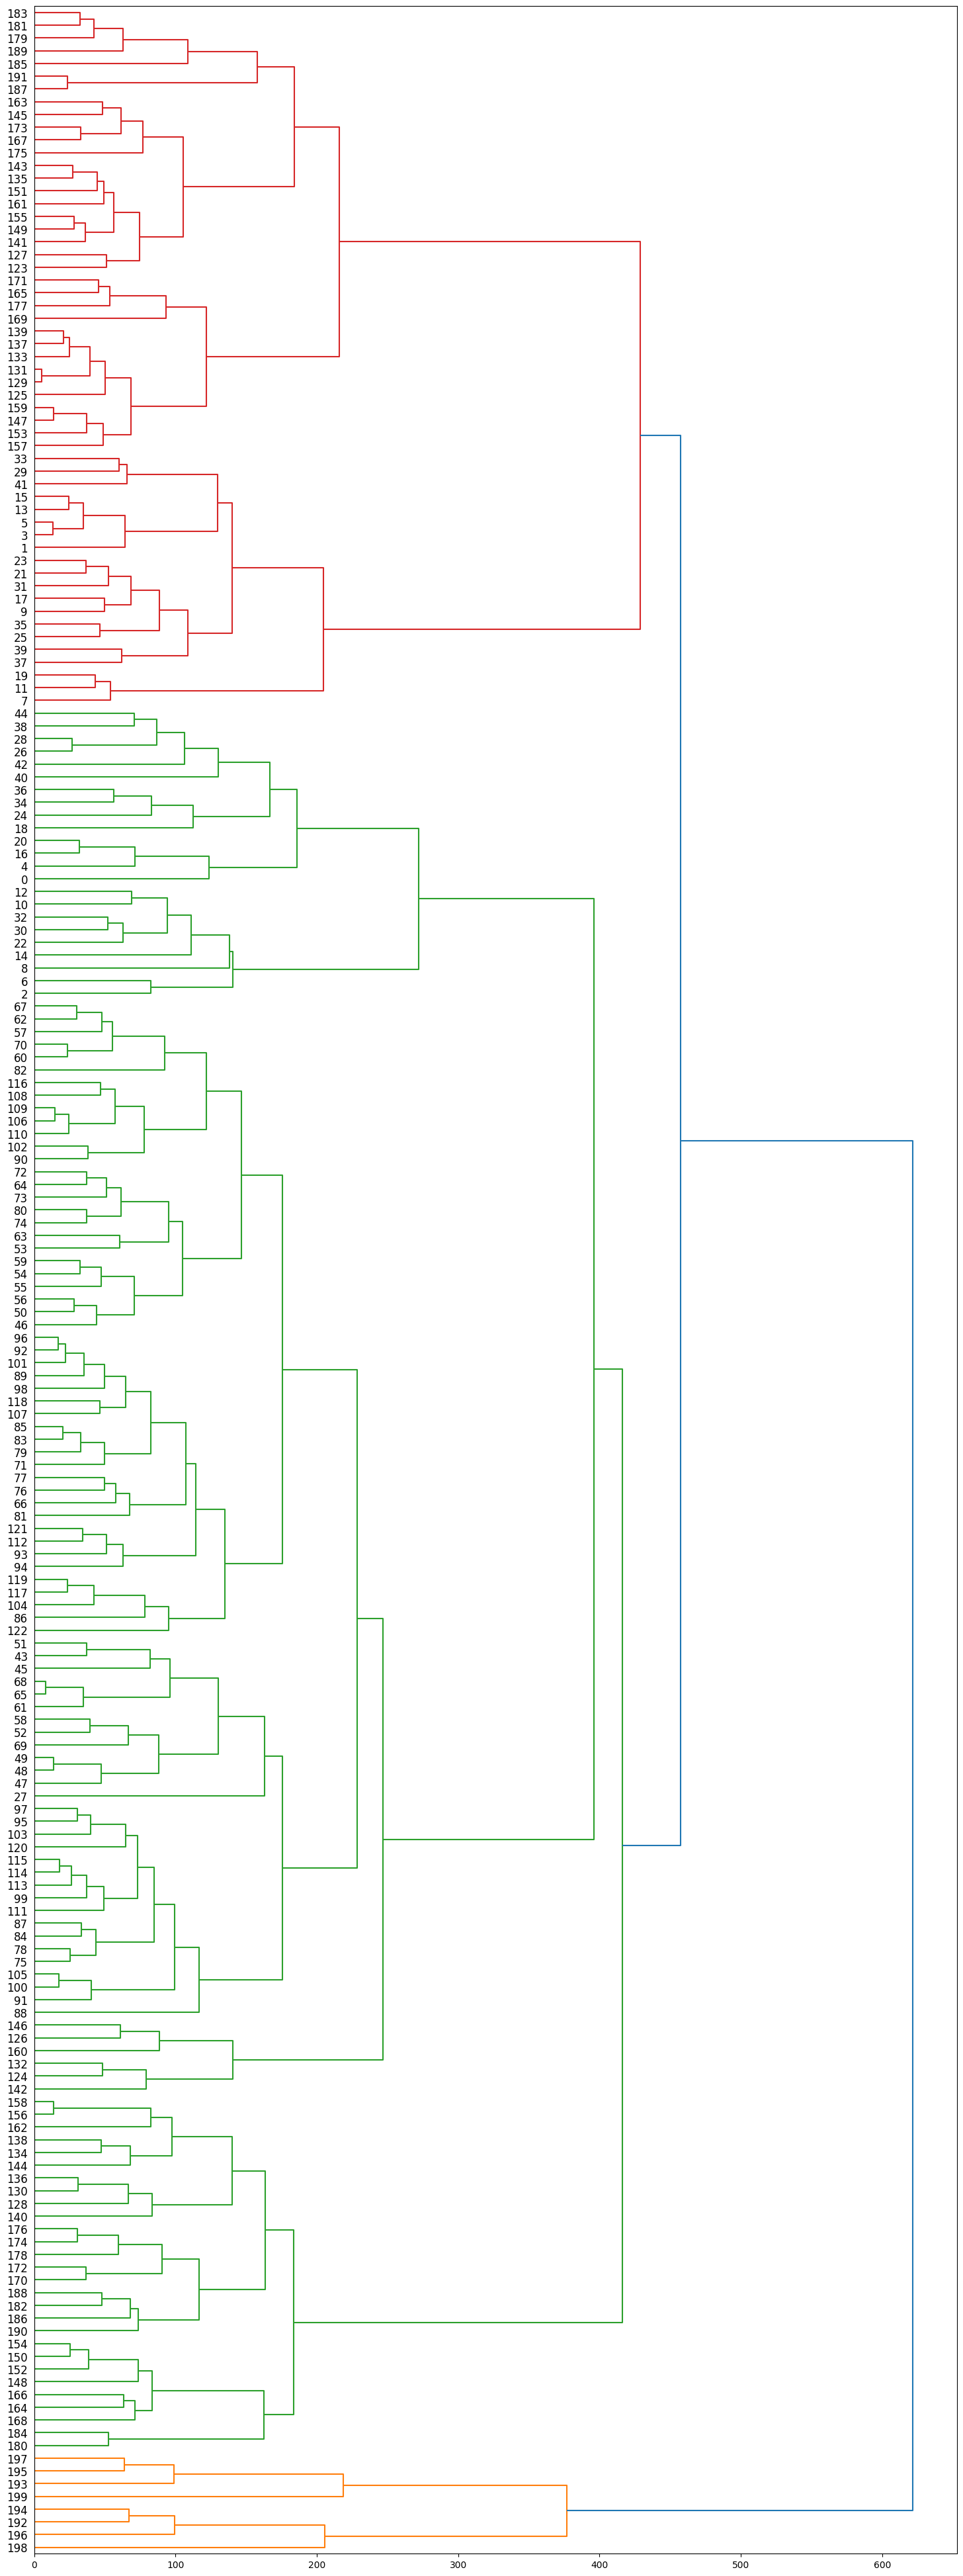

In [20]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### **4. Density Based Clustering (DBSCAN)**

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

### **Modeling**
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
__Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
__minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.

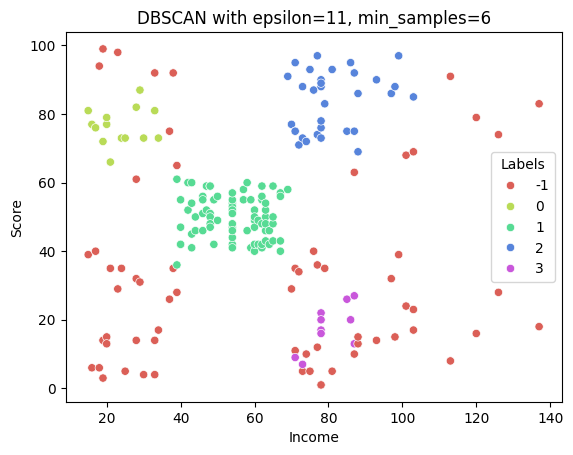

In [21]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon=11, min_samples=6')
plt.show()

>**Conclusion:**
* As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.
* DBSCAN cho kết quả có đôi chút khác so với `K-Means` và `Hierarchical`.
* DBSCAN phân các vùng có cùng mật độ vào 1 cluster.
* DBSCAN chỉ cho ra 4 cluster, cluster -1 là phần biên của 4 cluster kia. Lý do là tại vùng biên này, mật độ giống nhau, nên BDSCAN lầm tưởng chúng là 1 cluster riêng biệt.
* Trong trường hợp này tuy kết quả không tốt, nhưng DBSCAN cũng cho ta nhận thấy được các vùng của 1 cluster có các điểm có quan hệ chặt với nhau hơn, còn gọi là vùng core của 1 cluster, ở vùng này mật độ các điểm cao ==> Các điểm này có độ tương quan cao, giống nhau hơn về tính chất.

### **5. Mean Shift Algorithm**
* https://www.geeksforgeeks.org/ml-mean-shift-clustering/
* MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.
* `The algorithm automatically sets the number of clusters`, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided `estimate_bandwidth` function, which is called if the bandwidth is not set.
* Mean Shift có ý tưởng gần giống như với Grid-Based. Mean-Shift không cần input là số lượng cluster, sau khi chạy thuật toán tự trả về số lượng này ==> Có thể áp dụng thuật toán này trước để tìm số lượng cluster.
* Mean-Shift: Tính mean sau đó shift (Dịch chuyển)

In [29]:
X = df.drop(['CustomerID', 'Gender'],axis=1)
display(X.head())

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [30]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(X, test_size=0.2, random_state=93)
est_bandwidth = estimate_bandwidth(X, quantile=0.1)
mean_shift = MeanShift(bandwidth=est_bandwidth, bin_seeding=True).fit(X)
labels_unique = np.unique(mean_shift.labels_)
n_clusters_ = len(labels_unique)

print('Number of estimated cluster: %d'%n_clusters_)

Number of estimated cluster: 5


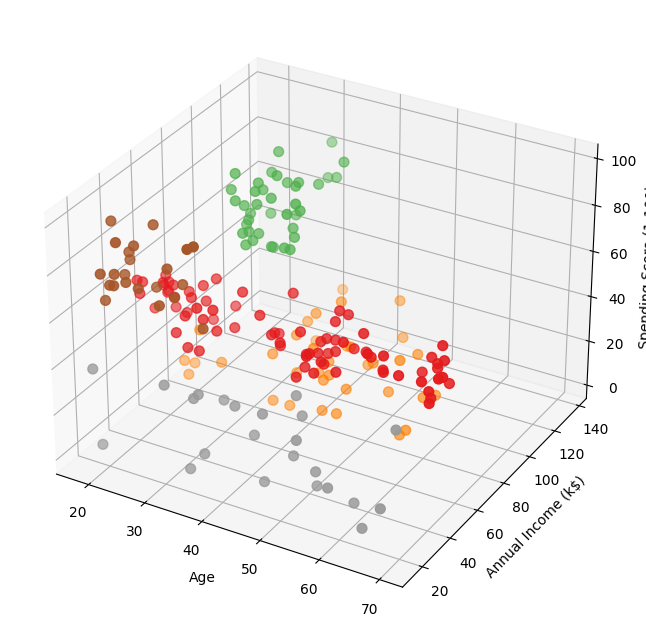

In [38]:
fig = plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.scatter3D(X['Age'], X['Income'], X['Score'], c=mean_shift.labels_, s=50, cmap='Set1')
xlabel = ax.set_xlabel('Age')
ylabel = ax.set_ylabel('Annual Income (k$)')
zlabel = ax.set_zlabel('Spending Score (1-100)')

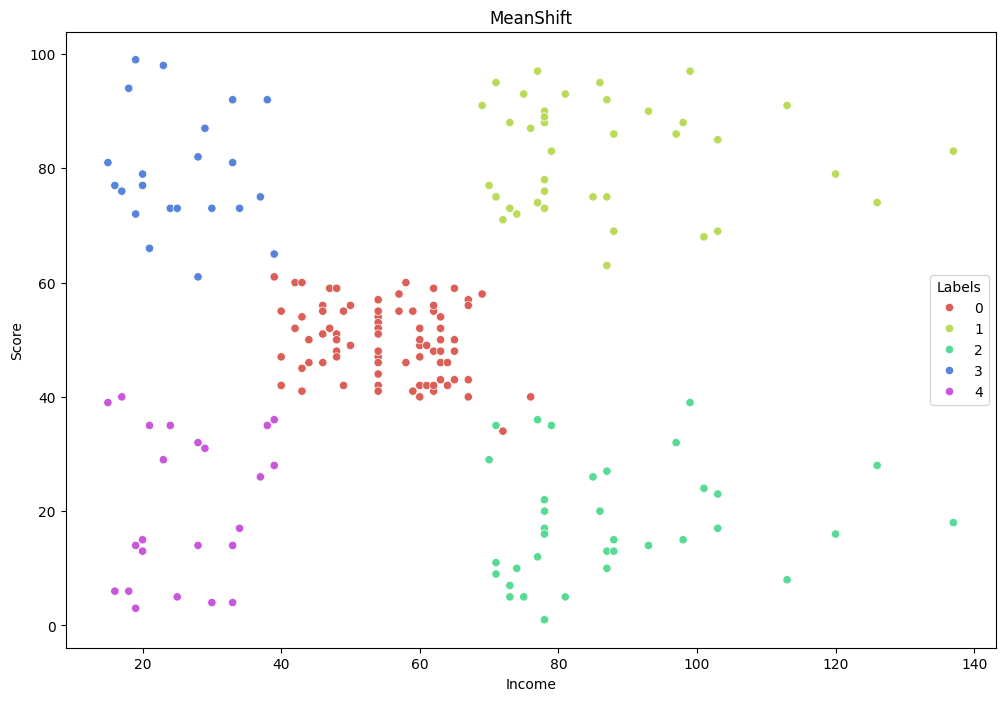

In [39]:
X['Labels'] = mean_shift.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x= X['Income'], y = X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(mean_shift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

### **6. Local Outlier Factor Algorithm**
* Thuật toán giúp phát hiện ra outlier dựa trên cơ chế `Neighbors`, có thể áp dụng thuật toán này trước khi phân nhóm để loại bỏ các outlier.

In [45]:
from sklearn.neighbors import LocalOutlierFactor
def CalculateLOFFactor(dataframe, featurelist, neighbors=10):
  clf = LocalOutlierFactor(n_neighbors=neighbors)
  AttData = dataframe.loc[:, featurelist].values
  y_pred = clf.fit_predict(AttData)
  AttData_scores = -1*clf.negative_outlier_factor_
  LOFFactorData = pd.DataFrame(AttData_scores, columns=['LOF'])
  return LOFFactorData

In [54]:
X = df.drop(['CustomerID', 'Gender'],axis=1)
display(X.head())

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [55]:
featurelist = list(X.columns)
LOFFactorData = CalculateLOFFactor(X, featurelist, neighbors=3)
display(LOFFactorData.head()) # Dataframe chứa giá trị thể hiện cho mức độ outlier của từng điểm
X['LOFFactorMetric'] = list(LOFFactorData['LOF'])
display(X.head())

,LOF
0,1.421523
1,1.189694
2,1.412138
3,0.980050
4,1.059210


,Age,Income,Score,LOFFactorMetric
0,19,15,39,1.421523
1,21,15,81,1.189694
2,20,16,6,1.412138
3,23,16,77,0.980050
4,31,17,40,1.059210


In [48]:
X["Outlier"] = X["LOFFactorMetric"] > 1.4
display(X.head())

,Age,Income,Score,LOFFactorMetric,Outlier
0,19,15,39,1.421523,True
1,21,15,81,1.189694,False
2,20,16,6,1.412138,True
3,23,16,77,0.980050,False
4,31,17,40,1.059210,False


<Axes: xlabel='Income', ylabel='Score'>

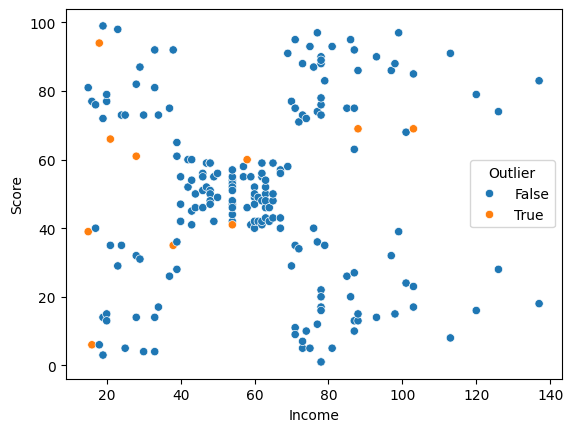

In [49]:
sns.scatterplot(x= X['Income'], y = X['Score'], hue=X['Outlier'])

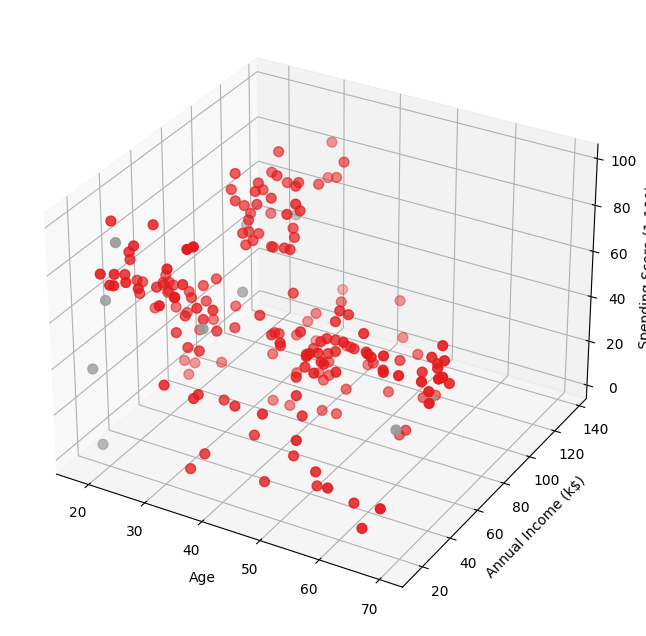

In [51]:
fig = plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.scatter3D(X['Age'], X['Income'], X['Score'], c=X['Outlier'], s=50, cmap='Set1')
xlabel = ax.set_xlabel('Age')
ylabel = ax.set_ylabel('Annual Income (k$)')
zlabel = ax.set_zlabel('Spending Score (1-100)')